# Importing Libraries

In [53]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Fetching Dataset

In [17]:
mnist = fetch_openml('mnist_784')

In [18]:
X,y = mnist['data'] , mnist['target']

In [19]:
X.shape

(70000, 784)

In [20]:
y.shape

(70000,)

In [28]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


# Plotting the Digit

In [34]:
some_index = 32000
some_digit = X.iloc[some_index]
some_digit_image = some_digit.values.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

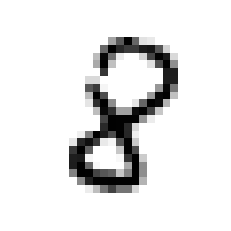

In [37]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

Correctly labelled as you can see from the y_label of this row.

In [38]:
y[32000]

'8'

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=10)

# Creating a 8 Detector

In [54]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_8 = (y_train==8)
y_test_8 = (y_test==8)

In [55]:
y_test_8

43814    False
49294    False
23871    False
14087    False
11764    False
         ...  
10029    False
551      False
12418    False
64939    False
54657    False
Name: class, Length: 7000, dtype: bool

In [69]:
clf = LogisticRegression(tol=0.1,solver='lbfgs')

In [70]:
clf.fit(X_train,y_train_8)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [71]:
 clf.predict([some_digit])

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [72]:
a=cross_val_score(clf,X_train,y_train_8,cv=3,scoring='accuracy')

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

So our classifier is 95% accurate. 

In [73]:
np.round(a.mean()*100)

95.0